In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Exploration des scores affiches par Fandango par rapport aux ecaluations des utilisateurs reels

In [20]:
fandango = pd.read_csv("./Datasets/fandango_scrape.csv")

Tache: Explorez les proprietes du DataFrame et Head.

In [21]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [22]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [23]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Explorons la relation entre la popularité d'un filme et son classement. creation d'un nuage de point montrant la relation entre les notes et les votes. 

<Axes: xlabel='RATING', ylabel='VOTES'>

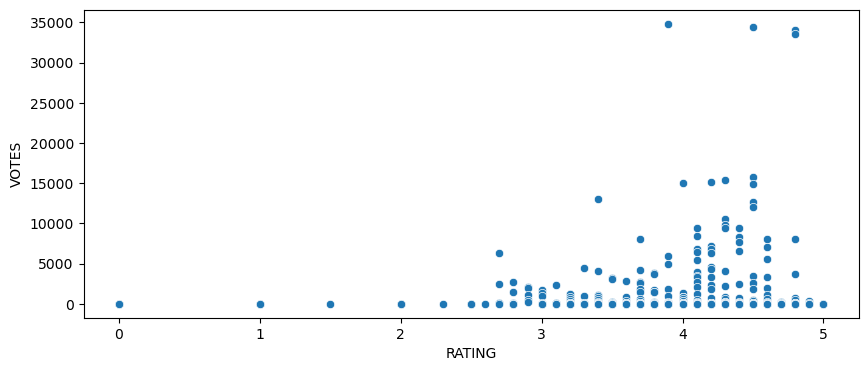

In [24]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango, y= "VOTES", x="RATING")

on calcule  la correlation entre les colonnes/features:

In [27]:
# Sélectionne uniquement les colonnes numériques pour calculer la corrélation
numeric_fandango = fandango.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_fandango.corr()


In [29]:
numeric_fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Extraction de l'annee en supporsant que chaque ligne de la colonne FILM ait la meme format:

In [30]:
title = "Nom du titre du film (Année)"

In [32]:
title.split('(')[-1].replace(')','')

'Année'

In [33]:
fandango['YEAR']=fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [34]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


Trouvons, combien de films y'a-t-il par annee dans le dataFrame

In [36]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

Visualisation des nombre de films par an avec un graphe

<Axes: xlabel='YEAR', ylabel='count'>

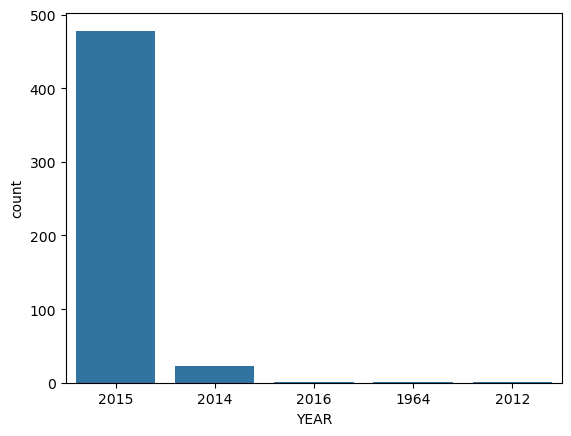

In [37]:
sns.countplot(data=fandango,x='YEAR')

touvons les 10 films ayant obtenu le plus grand nombre de votes

In [38]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Les films qui  n'ont aucun  avis/votes

In [40]:
no_votes = fandango['VOTES']==0 

In [41]:
no_votes.sum()

69

Creation d'un DataFrame avec uniquement des films evalues(en supprimant tous les filme qui n'ont aucun vote)

In [42]:
fan_reviewed= fandango[fandango['VOTES']>0]

comme indique dans l'article, en raison de l'affichage HTML et du classement par etoilles, la note reelle de l'utilisateur peut etre legerement differente de celle affichee a un utilisateur.  Visualisons cette differences avec des distributions.
-on cree un diagramme KDE(ou plusieur kdplots) qui affiche la distribution des notes affichees (STARS) par rapport a l'evaluation reelle des votes(RATING). on limite les KDE a 0-5.

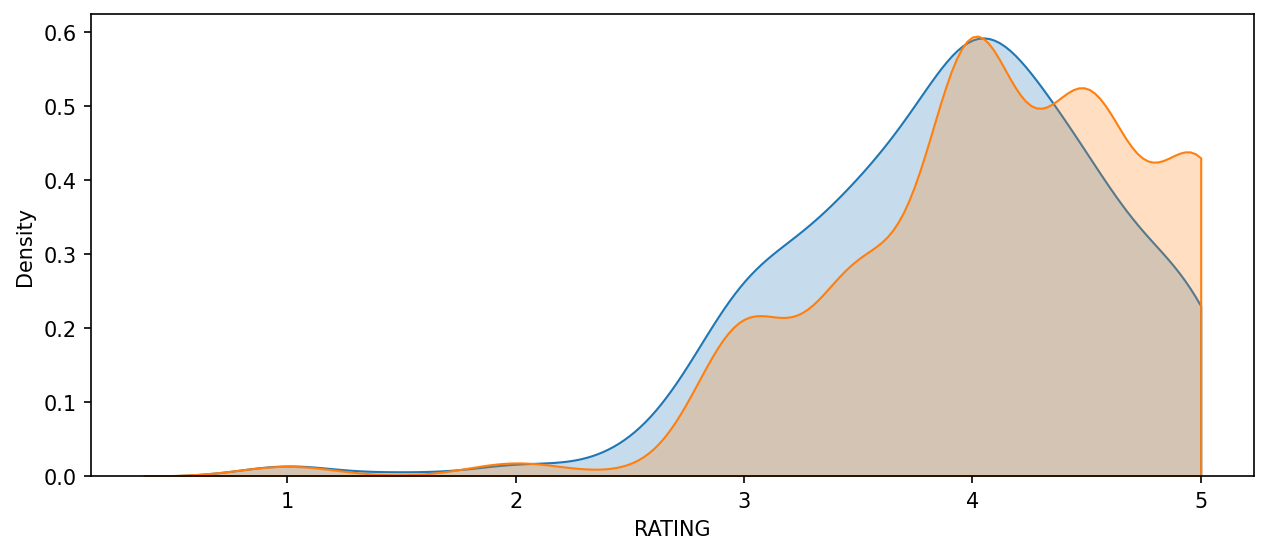

In [49]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True, label='Note reel')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True, label='Etoiles affichees')

plt.legend=loc=(1.05,0.5)

quantifions mainenet cet ecart, on cree une nouvelle colonne de la difference entre etoilles affichees(STARS) et les notes reelles(RATING). on calclule cette difference avec STARS-RATING et on l'arrondi a la decimale  le plus proche.

In [52]:
fan_reviewed['STARS_DIFF'] =fan_reviewed['STARS'] -fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] =fan_reviewed['STARS_DIFF'].round(2)

/tmp/ipykernel_80325/2999652800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] =fan_reviewed['STARS'] -fan_reviewed['RATING']
/tmp/ipykernel_80325/2999652800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] =fan_reviewed['STARS_DIFF'].round(2)


In [53]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Creation d'un diagramme de comptage(countplot) pour afficher le nombre de fois qu'une certaine difference es produit parmis tous les films

/tmp/ipykernel_80325/4246019964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

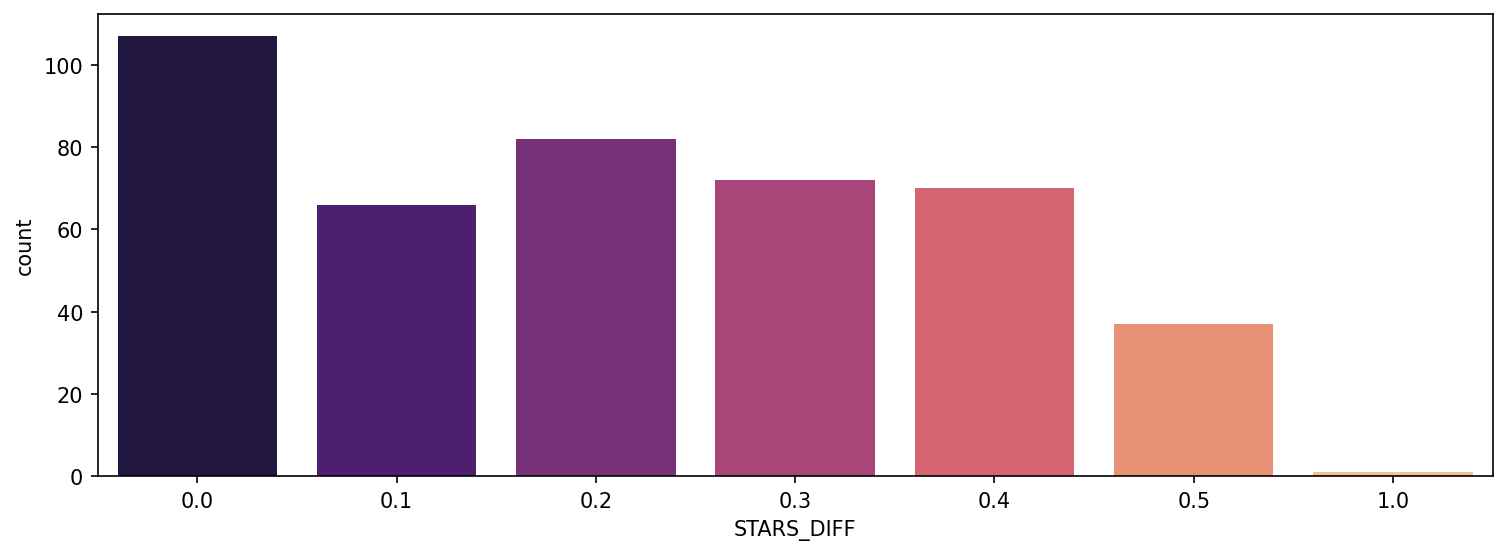

In [56]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

Nous pouvons voir sur le diagramme precedent qu'un film affichait une  difference d'une etoile par apport a sa veritable note, 

In [59]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


2. Comparaison des evaluations de Fandango avec d'autres plateforme 

comparons les scores de fandango avec d'autre sites 

In [61]:
all_sites = pd.read_csv('./Datasets/all_sites_scores.csv')

Explorons les colonnes du DataFrame, ses information, sa description

In [62]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [63]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [64]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Rotten Tomatoes

RT a deux series de critiques, leurs (evaluation publiees par des critiques officielles) et  les avis des utilisateurs.
 
 Creons un nuage de point explorant la relation entre  les avis des critiques RT et les avis des  utilisateurs

(0.0, 100.0)

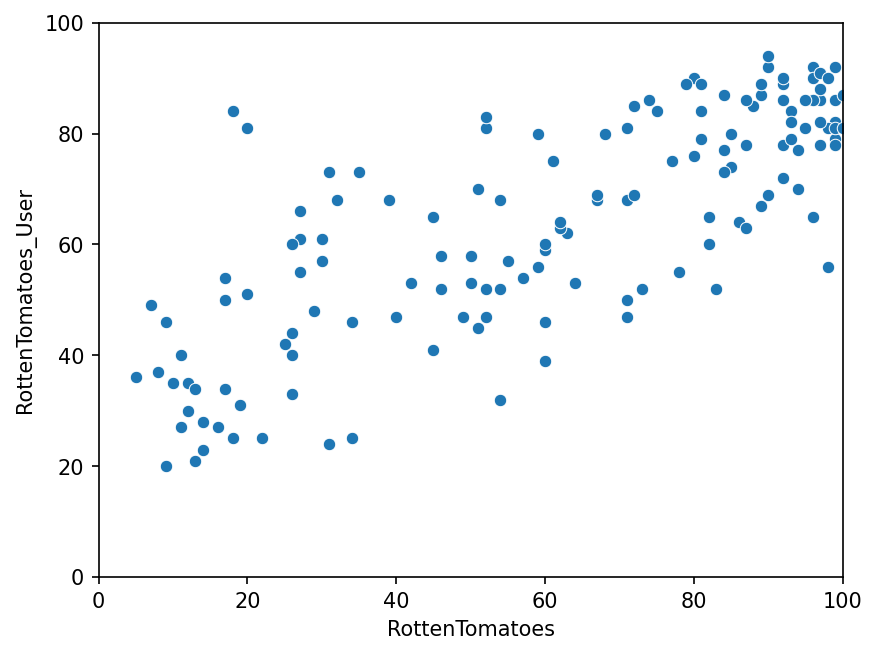

In [69]:
plt.figure(dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [70]:
all_sites['Rotten_Diff']= all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

calculons la difference absolue moyenne entre les notes RT et les notes des utilisateurs RT comme decrit----

In [72]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Tracons  la distribution entre la note des critiques RT et la note des utilisateurs RT. Ce diagramme de  distribution dois compprter les des valeurs negatives.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

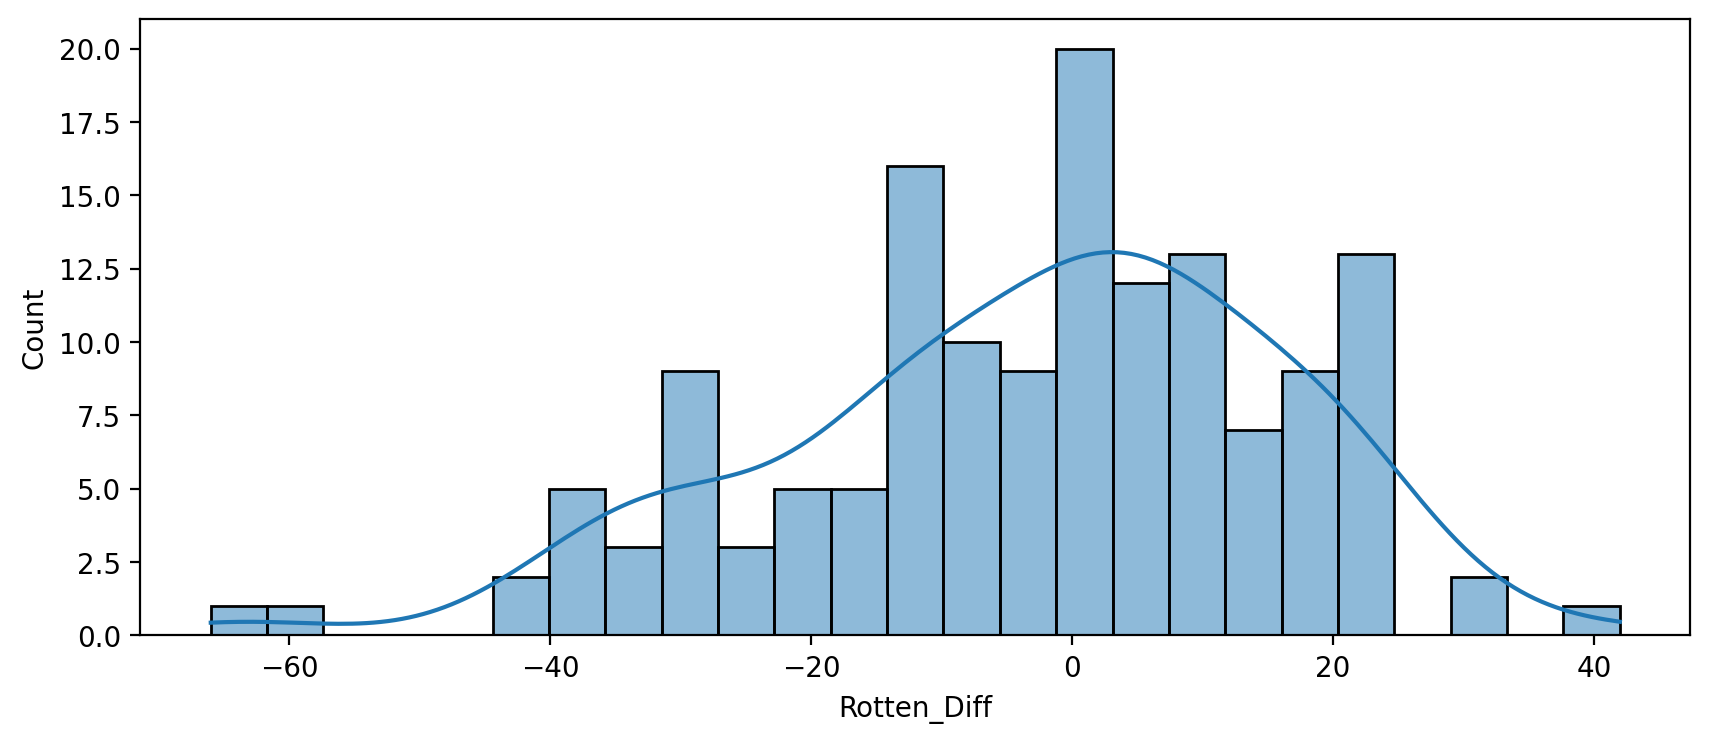

In [73]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)


<Axes: xlabel='Rotten_Diff', ylabel='Count'>

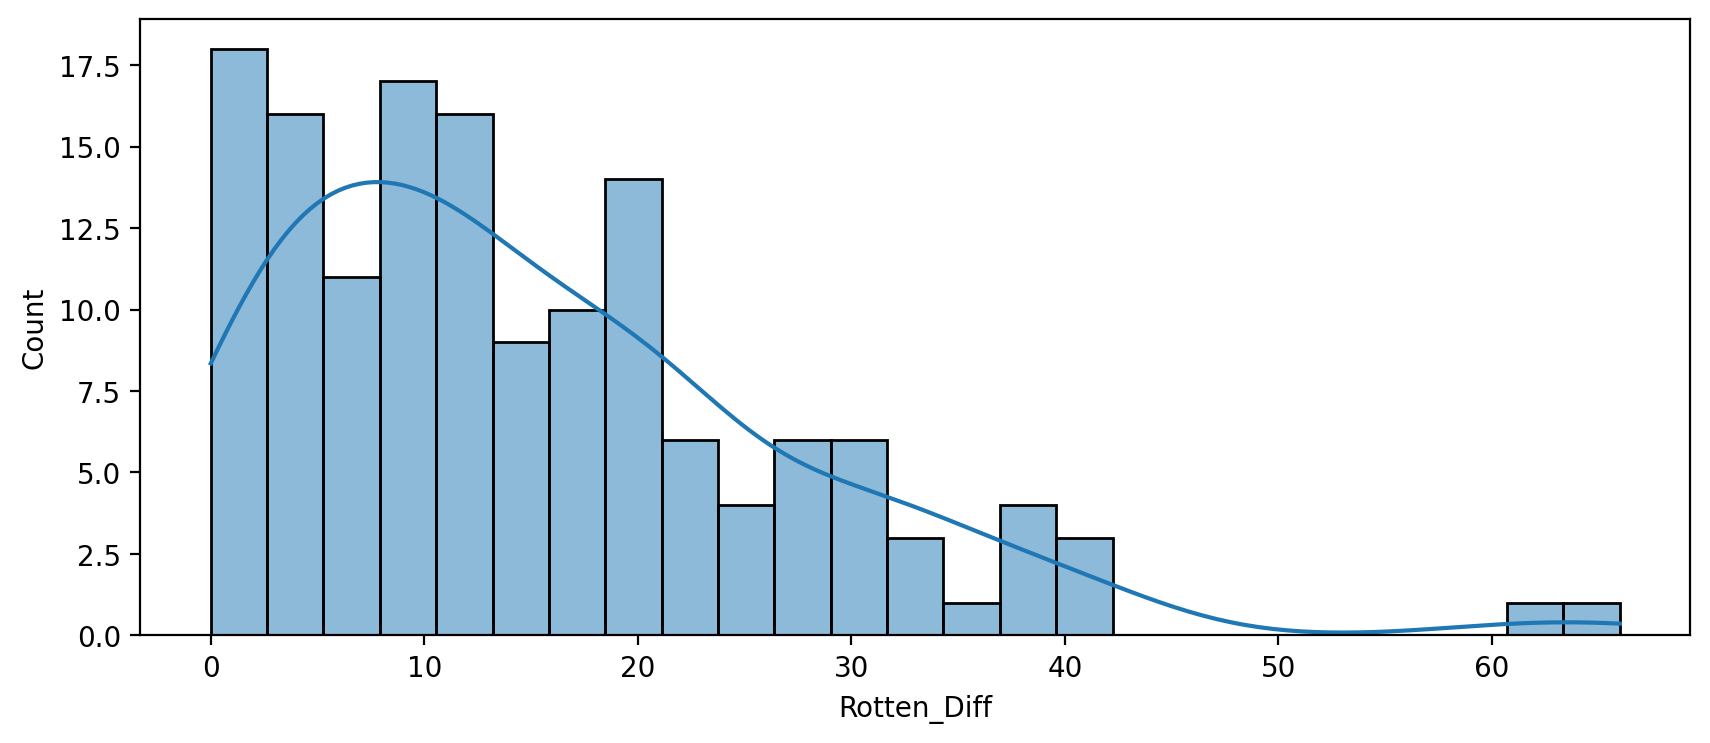

In [75]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)

VOyons quels films sont a l'origine des differences les plus importantes:
-les 5 meillleurs fims presentant le plus grande differences negative entre les utilisateurs et les critiques de RT.


In [76]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

les 5 des films qui  ont obtenue une note moyenne des critique superieur a cellee des utilisateurs

In [77]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

MetaCritic Analyse

Creons un nuage de points de la note MataCritic par rapport a la note Meacritic des utilisateurs

(0.0, 100.0)

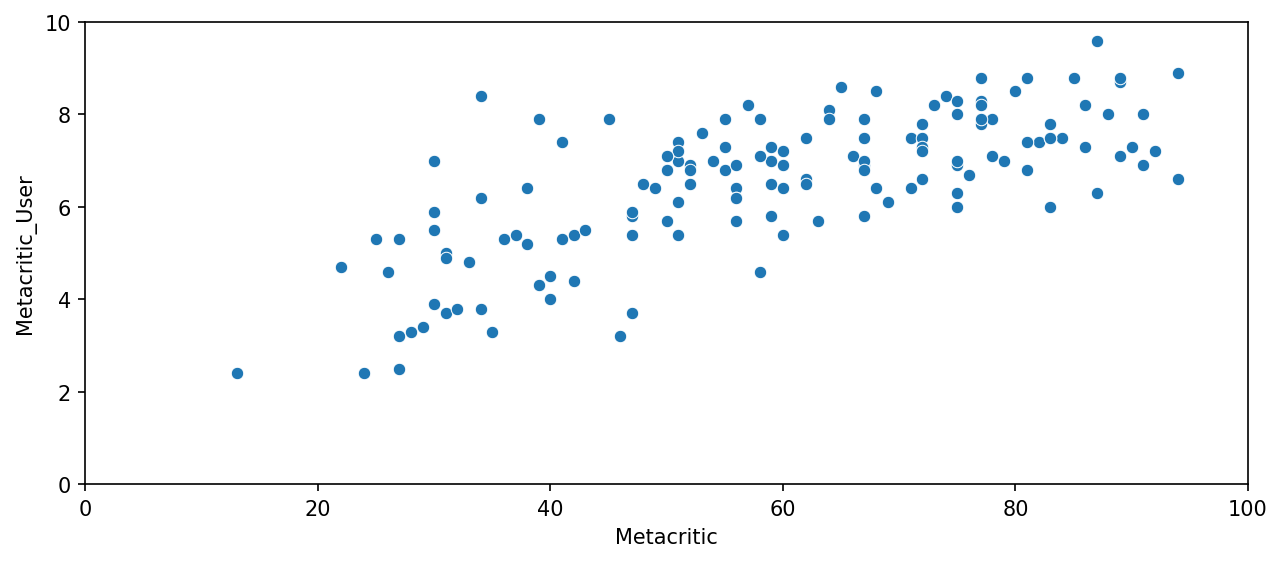

In [80]:
plt.figure(dpi=150, figsize=(10,4))
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

IMDb  analyse
Creons un nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb